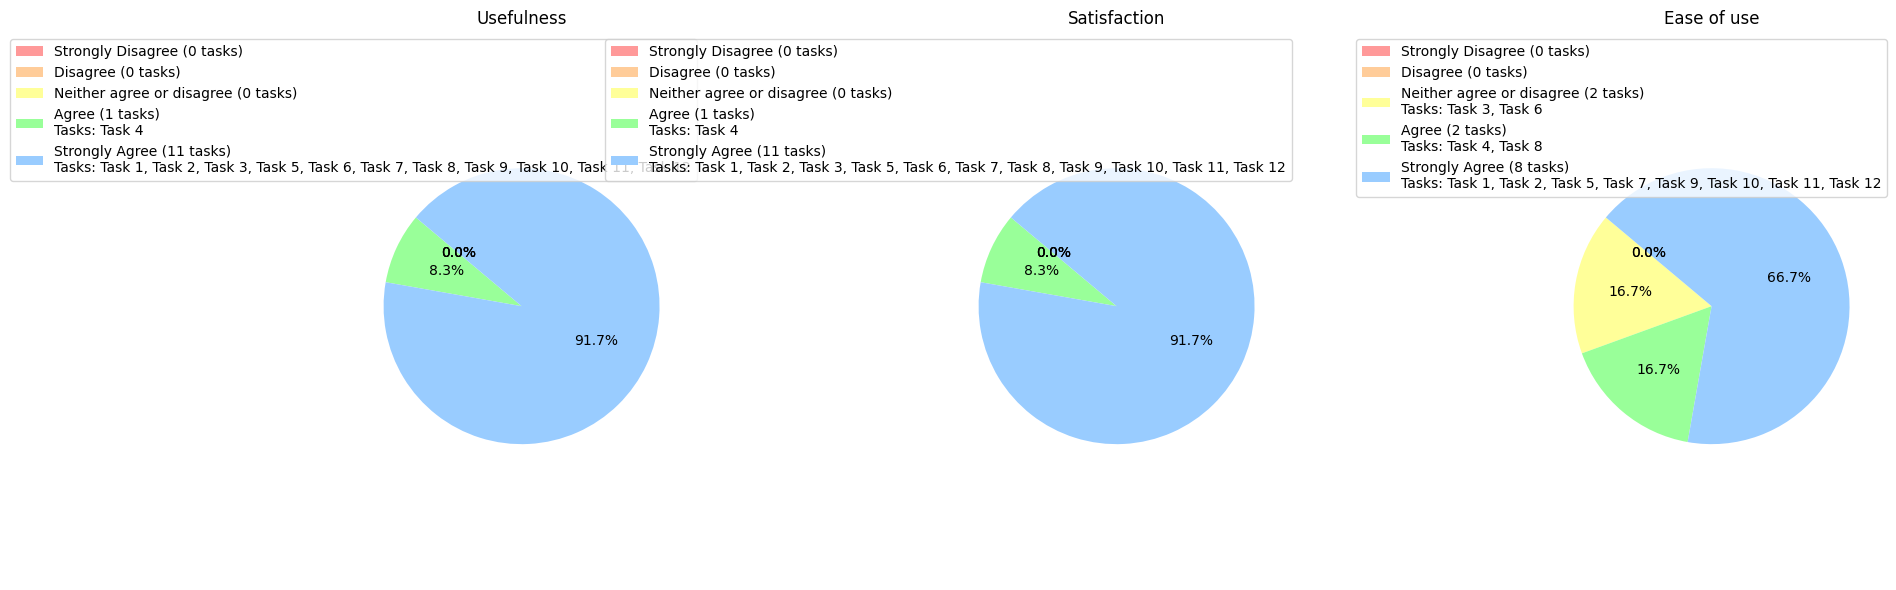

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
file_path = "1.csv"  # 请将此路径替换为您的实际 CSV 文件路径
df = pd.read_csv(file_path)

# 定义要分析的陈述和对应的列名关键词
statements = {
    "Usefulness": "[It is useful: It does everything I would expect it to do.]",
    "Satisfaction": "[I am satisfied with it: It is pleasant to use.]",
    "Ease of use": "[It is easy to use: Using it is effortless.]"
}

# 定义响应类别
response_categories = [
    "Strongly Disagree",
    "Disagree",
    "Neither agree or disagree",
    "Agree",
    "Strongly Agree"
]

# 定义颜色列表，按照响应类别的顺序
colors = ["#FF9999", "#FFCC99", "#FFFF99", "#99FF99", "#99CCFF"]  # 您可以根据喜好调整颜色

# 创建一个图形和三个子图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # figsize 参数调整图形大小

# 遍历每个陈述，生成饼图
for idx, (statement_title, statement_keyword) in enumerate(statements.items()):
    # 找到包含特定陈述的列
    statement_columns = [col for col in df.columns if statement_keyword in col]
    
    # 提取任务编号
    tasks = [col.split(":")[0].strip() for col in statement_columns]
    
    # 提取响应
    responses = df.iloc[0][statement_columns].values  # 假设只有一行数据，如果有多行，请修改此部分
    
    # 创建一个 DataFrame 来存储任务和响应
    data = pd.DataFrame({
        "Task": tasks,
        "Response": responses
    })
    
    # 为了在饼图中显示任务编号，创建一个字典：响应类别 -> 任务列表
    response_tasks = data.groupby("Response")["Task"].apply(list).reindex(response_categories, fill_value=[]).to_dict()
    
    # 准备饼图数据
    sizes = []
    labels = []
    for category in response_categories:
        task_list = response_tasks.get(category, [])
        sizes.append(len(task_list))
        if task_list:
            # 将任务编号合并为字符串
            tasks_str = ', '.join(task_list)
            label = f"{category} ({len(task_list)} tasks)\nTasks: {tasks_str}"
        else:
            label = f"{category} (0 tasks)"
        labels.append(label)
    
    # 绘制饼图
    ax = axes[idx]
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=None,  # 我们将自定义图例，因此这里不需要标签
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 10}
    )
    ax.set_title(statement_title)
    ax.axis('equal')  # 保证饼图为圆形

    # 添加图例，显示标签和任务列表
    legend_labels = []
    for i in range(len(labels)):
        legend_labels.append(labels[i])
    ax.legend(wedges, legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1))
    
# 调整子图布局
plt.tight_layout()
plt.show()
